In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
X = pd.read_csv('../Datasets/NB.csv')
X['Fault'] = 0

y = pd.read_csv('../Datasets/IR - 7.csv')
y['Fault'] = 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 0)

In [4]:
train = X_train.append(y_train)
train

,DE,FE,Fault
103476,0.062585,0.041091,0
96984,-0.075102,-0.013765,0
114732,-0.048190,-0.001233,0
10916,0.069260,0.028558,0
37646,0.040054,0.065335,0
...,...,...,...
45891,0.110131,-0.312085,1
117952,-0.909962,-0.030202,1
42613,0.676380,0.007396,1
43567,0.011208,0.209975,1


In [5]:
test = X_test.append(y_test)
test

,DE,FE,Fault
121079,0.046313,0.054651,0
107924,-0.015855,0.061636,0
22678,-0.065297,0.122862,0
55190,-0.112652,0.066978,0
92048,0.023991,0.034105,0
...,...,...,...
103358,0.019330,0.088962,1
54412,-0.072284,0.288664,1
50632,0.259571,-0.293184,1
89251,0.010883,-0.042324,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [7]:
train = train.values.reshape(-1, 1, 3)

test  = test.values.reshape(-1, 1, 3)

In [8]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [9]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4608      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 32)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 3)              99        
Total params: 13,027
Trainable params: 13,027
Non-trainable params: 0
__________________________________________________

In [10]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Train on 174463 samples, validate on 19385 samples
Epoch 1/100
174463/174463 [==============================] - 3s 19us/step - loss: 0.1213 - accuracy: 0.4597 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 2/100
174463/174463 [==============================] - 3s 15us/step - loss: 0.0147 - accuracy: 0.7372 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 3/100
174463/174463 [==============================] - 3s 18us/step - loss: 0.0114 - accuracy: 0.7842 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 4/100
174463/174463 [==============================] - 3s 19us/step - loss: 0.0100 - accuracy: 0.7915 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 5/100
174463/174463 [==============================] - 4s 22us/step - loss: 0.0088 - accuracy: 0.7964 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 6/100
174463/174463 [==============================] - 4s 22us/step - loss: 0.0080 - accuracy: 0.8019 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 7/100
174463/174463 [======================

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103723). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 5s 28us/step - loss: 0.0028 - accuracy: 0.8366 - val_loss: 5.0797e-04 - val_accuracy: 0.9999
Epoch 26/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0028 - accuracy: 0.8392 - val_loss: 4.4436e-04 - val_accuracy: 1.0000
Epoch 27/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0028 - accuracy: 0.8410 - val_loss: 4.9663e-04 - val_accuracy: 0.9999
Epoch 28/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0028 - accuracy: 0.8422 - val_loss: 4.3132e-04 - val_accuracy: 0.9999
Epoch 29/100
174463/174463 [==============================] - 4s 26us/step - loss: 0.0027 - accuracy: 0.8435 - val_loss: 4.5194e-04 - val_accuracy: 0.9999
Epoch 30/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0027 - accuracy: 0.8439 - val_loss: 4.1946e-04 - val_accuracy: 1.0000
Epoch 31/100
174463/174463 [==============================] - 4s 25us/step - loss: 

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.132645). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 5s 28us/step - loss: 0.0025 - accuracy: 0.8447 - val_loss: 2.7429e-04 - val_accuracy: 1.0000
Epoch 55/100
174463/174463 [==============================] - 4s 25us/step - loss: 0.0025 - accuracy: 0.8434 - val_loss: 2.7724e-04 - val_accuracy: 1.0000
Epoch 56/100
174463/174463 [==============================] - 4s 25us/step - loss: 0.0025 - accuracy: 0.8456 - val_loss: 2.9775e-04 - val_accuracy: 1.0000
Epoch 57/100
174463/174463 [==============================] - 4s 24us/step - loss: 0.0025 - accuracy: 0.8443 - val_loss: 3.1007e-04 - val_accuracy: 1.0000
Epoch 58/100
174463/174463 [==============================] - 5s 28us/step - loss: 0.0025 - accuracy: 0.8453 - val_loss: 2.8041e-04 - val_accuracy: 1.0000
Epoch 59/100
174463/174463 [==============================] - 4s 26us/step - loss: 0.0025 - accuracy: 0.8455 - val_loss: 3.4689e-04 - val_accuracy: 1.0000
Epoch 60/100
174463/174463 [==============================] - 5s 27us/step - loss: 

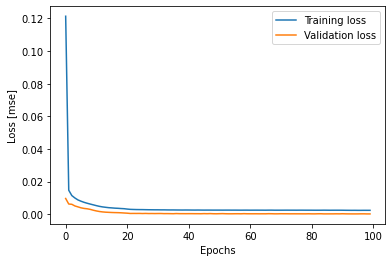

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss [mse]')
plt.show()

In [12]:
pred_train = model.predict(train)

In [13]:
pred_train = pred_train.reshape(pred_train.shape[0],pred_train.shape[2])
train = train.reshape(train.shape[0],train.shape[2])

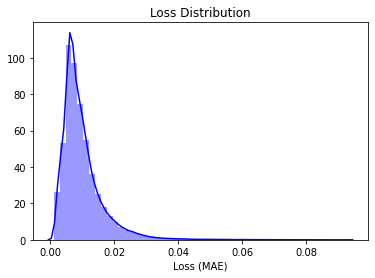

In [14]:
import seaborn as sns

scored = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [15]:
TH = 0.04
pred_train = pd.DataFrame(pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [16]:
scored_train['Loss_mae'].mean()

0.00985125269670351

Text(0, 0.5, 'Loss (MAE)')

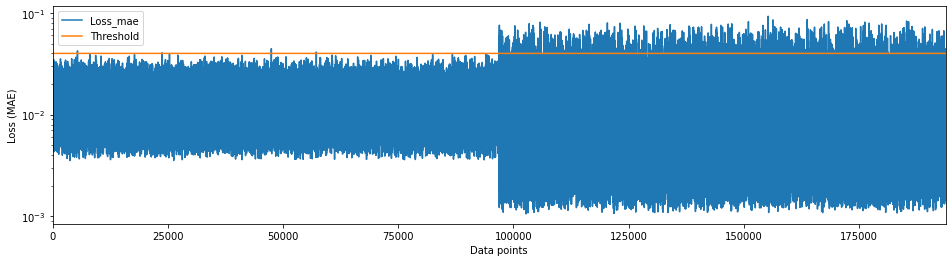

In [17]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [18]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.008525,0.04,False
1,0.015897,0.04,False
2,0.010696,0.04,False
3,0.008092,0.04,False
4,0.008575,0.04,False
...,...,...,...
193843,0.010694,0.04,False
193844,0.025897,0.04,False
193845,0.021029,0.04,False
193846,0.006040,0.04,False


In [19]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
5352    0.042326       0.04     True
23740   0.040535       0.04     True
47447   0.044496       0.04     True
57215   0.041266       0.04     True
96942   0.059166       0.04     True
...          ...        ...      ...
193452  0.066693       0.04     True
193503  0.042894       0.04     True
193511  0.042603       0.04     True
193550  0.041959       0.04     True
193780  0.044344       0.04     True

[1193 rows x 3 columns]
(1193, 3)


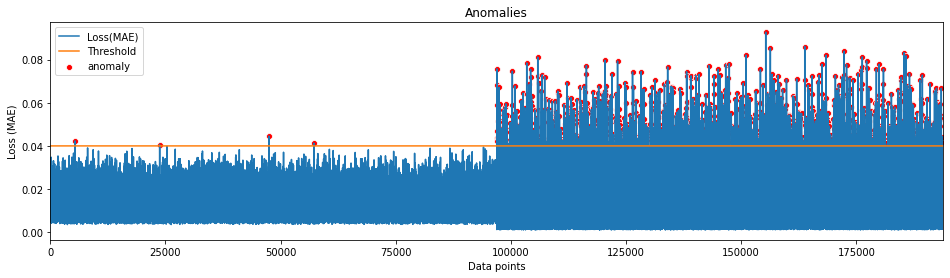

In [20]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [21]:
pred_test = model.predict(test)

In [22]:
score = model.evaluate(test,test)
score

48462/48462 [==============================] - 3s 71us/step


[0.00019521801377405626, 0.8810820579528809]

In [23]:
pred_test = pred_test.reshape(pred_test.shape[0],pred_test.shape[2])
test = test.reshape(test.shape[0],test.shape[2])

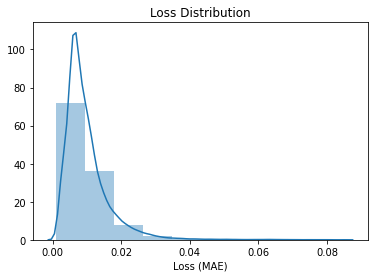

In [24]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [25]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.008411,0.04,False
1,0.006976,0.04,False
2,0.012809,0.04,False
3,0.015291,0.04,False
4,0.006587,0.04,False
...,...,...,...
48457,0.002941,0.04,False
48458,0.006404,0.04,False
48459,0.010840,0.04,False
48460,0.005397,0.04,False


In [26]:
scored_test['Loss_mae'].mean()

0.009881675696851538

Text(0, 0.5, 'Loss (MAE)')

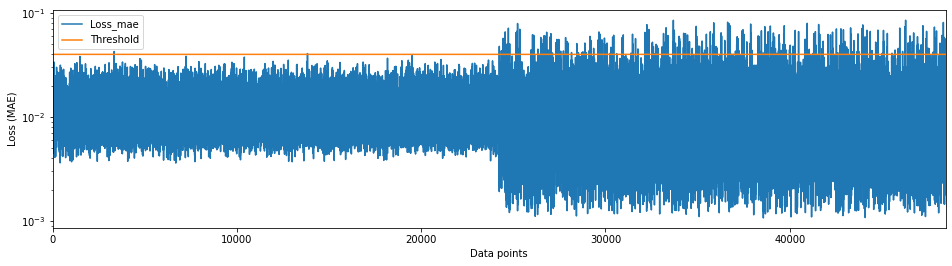

In [27]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [28]:
IR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(IR_anomalies)
print(IR_anomalies.shape)

       Loss_mae  Threshold  Anomaly
3330   0.042661       0.04     True
13824  0.040721       0.04     True
24236  0.047796       0.04     True
24347  0.043306       0.04     True
24446  0.057036       0.04     True
...         ...        ...      ...
48158  0.051300       0.04     True
48259  0.060898       0.04     True
48339  0.081073       0.04     True
48389  0.058263       0.04     True
48416  0.056897       0.04     True

[317 rows x 3 columns]
(317, 3)


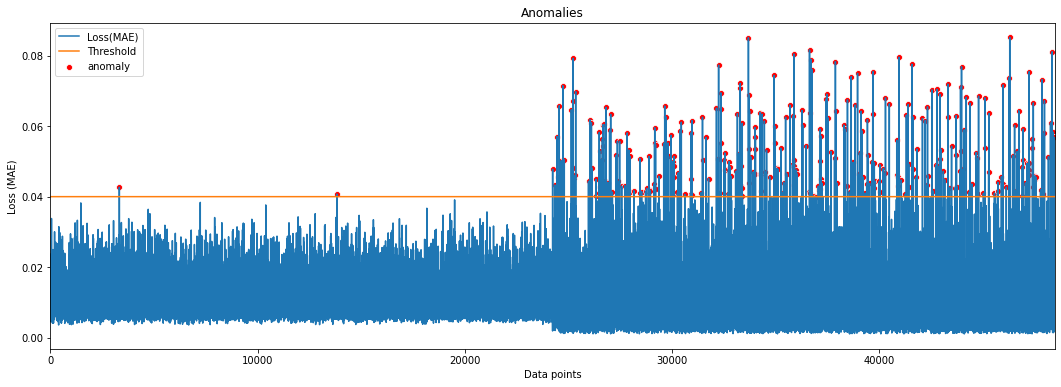

In [29]:
f, (ax2) = plt.subplots(figsize=(18, 6))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=IR_anomalies.index , y=IR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [30]:
print(score[1])

0.8810820579528809


In [31]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 88.11%


In [32]:
print("Anomalies: {}".format(IR_anomalies['Anomaly'].count()))

Anomalies: 317


In [33]:
# Seperating Normal and Faulty dataset
x = scored_test['Anomaly'].count() / 2

In [34]:
normal_test = scored_test[scored_test.index < x]
normal_test

,Loss_mae,Threshold,Anomaly
0,0.008411,0.04,False
1,0.006976,0.04,False
2,0.012809,0.04,False
3,0.015291,0.04,False
4,0.006587,0.04,False
...,...,...,...
24226,0.019799,0.04,False
24227,0.010816,0.04,False
24228,0.009241,0.04,False
24229,0.013841,0.04,False


In [35]:
IR_test = scored_test[scored_test.index >= x]
IR_test

,Loss_mae,Threshold,Anomaly
24231,0.005128,0.04,False
24232,0.005403,0.04,False
24233,0.005158,0.04,False
24234,0.001918,0.04,False
24235,0.004934,0.04,False
...,...,...,...
48457,0.002941,0.04,False
48458,0.006404,0.04,False
48459,0.010840,0.04,False
48460,0.005397,0.04,False


In [36]:
TP = normal_test[normal_test['Anomaly'] == False]
TP = TP['Anomaly'].count()
print("True Positives: {}".format(TP))

TN = IR_test[IR_test['Anomaly'] == False]
TN = TN['Anomaly'].count()
print("True Negatives: {}".format(TN))

FN = normal_test[normal_test['Anomaly'] == True]
FN = FN['Anomaly'].count()
print("False Negatives: {}".format(FN))

FP = IR_test[IR_test['Anomaly'] == True]
FP = FP['Anomaly'].count()
print("False Positives: {}".format(FP))

True Positives: 24229
True Negatives: 23916
False Negatives: 2
False Positives: 315


In [37]:
Precision = TP / (TP + FP)
print("Precision: {:.2f}%".format(Precision*100))

Recall = TP / (TP + FN)
print("Recall: {:.3f}%".format(Recall*100))

F1Score = (2*Precision*Recall)/(Precision+Recall)
print("F1 Score: {:.2f}%".format(F1Score*100))

Precision: 98.72%
Recall: 99.992%
F1 Score: 99.35%
